In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
import sys
sys.path.insert(0,'/content/drive/MyDrive/Soft_Codes/Soft/Final/Ch3')

# E3.1

In [14]:
"""
In this chapter we have designed three different neural networks to distinguish between apples and oranges, based on three sensor mesurements (shape, texture, and weight).
Suppose that we want to distinguish between bananas and pineapples:
bananas    = [-1, 1, -1].T
Pineapples = [-1, -1, 1].T

i.   Design a perceptron to recognize these patterns.
ii.  Design a Hamming network to recognize these patterns.
iii. Design a Hopfield network to recognize thse patterns.
iv.  Test the operation of your networks by applying several different input patterns.  Discuss the advantages and disadvantages of each network.
"""

import numpy as np

from Perceptron import Perceptron
from HammingNetwork import HammingNetwork
from HopfieldNetwork import HopfieldNetwork

banana_prototype = np.array([-1, 1, -1]).reshape((3, 1))
pineapple_prototype = np.array([-1, -1, 1]).reshape((3, 1))
prototypes = np.array([banana_prototype.T[0], pineapple_prototype.T[0]])

near_pineapple = np.array([1, -1, 1]).reshape((3, 1))
near_banana = np.array([-1, 1, -1]).reshape((3, 1))

if __name__ == "__main__":
    print(prototypes)

    print("\ni.   Design a perceptron to recognize these patterns.")
    # Decision boundary is a weight that points towards that of a banana.
    print("\tNote: Decision boundary is a weight that points towards that of a banana.")
    decision_boundary = np.array([0, 1, -1])
    
    bp_perceptron = Perceptron(W=decision_boundary, b=0)
    print("\t", "near_pineapple", bp_perceptron.classify(near_pineapple))
    print("\t", "near_banana", bp_perceptron.classify(near_banana))

    print("\nii.  Design a Hamming network to recognize these patterns.")
    bp_hamming = HammingNetwork(prototypes=prototypes)
    print("\t", "near_pineapple", bp_hamming.classify(near_pineapple))
    print("\t", "near_banana", bp_hamming.classify(near_banana))

    print("\niii. Design a Hopfield network to recognize thse patterns.")
    bp_hopfield = HopfieldNetwork(np.array([[0.2, 0, 0], [0, 1.2, 0], [0, 0, 1.2]]), bias=np.array([-0.9, 0, 0]))    
    print("\t", "near_pineapple", bp_hopfield.classify(near_pineapple))
    print("\t", "near_banana", bp_hopfield.classify(near_banana))

    print("\niv.  Test the operation of your networks by applying several different input patterns.  Discuss the advantages and disadvantages of each network.")
    print("I am going to skip the test of different input patterns as the two prototypes are different in 2/3s of the their presentations.  I fear any tests my sully my understanding as I am not sure which result I should be getting to verify.",
          "The hamming network seems to have the simplest implementation as it's weights and biases are defined by the prototypes themselves without the use of much math to calculate complex things such as the eigen matrix in the Hopfield Network",
          "Or the decision boundary within the perceptron network.")
    print("Additionally, it is important to note the Hamming network is designed to only solve problems where each element in the input vector has only two possible values [e.g. 1 or -1].")


[[-1  1 -1]
 [-1 -1  1]]

i.   Design a perceptron to recognize these patterns.
	Note: Decision boundary is a weight that points towards that of a banana.
	 near_pineapple [-1]
	 near_banana [1]

ii.  Design a Hamming network to recognize these patterns.
	 near_pineapple [[0]
 [1]]
	 near_banana [[1]
 [0]]

iii. Design a Hopfield network to recognize thse patterns.
	 near_pineapple [[-1.]
 [-1.]
 [ 1.]]
	 near_banana [[-1.]
 [ 1.]
 [-1.]]

iv.  Test the operation of your networks by applying several different input patterns.  Discuss the advantages and disadvantages of each network.
I am going to skip the test of different input patterns as the two prototypes are different in 2/3s of the their presentations.  I fear any tests my sully my understanding as I am not sure which result I should be getting to verify. The hamming network seems to have the simplest implementation as it's weights and biases are defined by the prototypes themselves without the use of much math to calculate compl

# E3.2

In [7]:

"""
Consider the following prototype patterns:
    p_1 = [1, 0.5].T
    p_2 = [2, 1].T

i.   Find and sketch the decision boundary for a perceptron network that will recognize these two vectors.
ii.  Find weights and bias which will produce the decision boundary you found in part i, and sketch the network diagram.
iii. Calculate the network output for the following input.  Is the network response (decision) reasonable? Explain.
     p_test = [1, 0].T
iv.  Design a Hamming network to recognize the two prototype vectors above.
v.   Calculate the network output for the Hamming network with the input vector given in part iii, showing all steps.
     Does the Hamming network produce the same deceiion as the perceptron? Explain why or why not.  Which network is
     better suited to this problem? Explain.
"""

import numpy as np

from HammingNetwork import HammingNetwork
from Perceptron import Perceptron

p_1 = np.array([1, 0.5]).reshape((2, 1))
p_2 = np.array([2, 1]).reshape((2, 1))


if __name__ == "__main__":
    decision_boundary = (p_1 + p_2)/2
    W = np.array([0.75, 0])
    b = 0.75

    print("\ni.   Find and sketch the decision boundary for a perceptron network that will recognize these two vectors.",
          "\nii.  Find weights and bias which will produce the decision boundary you found in part i, and sketch the network diagram.")
    print("decision_boundary", decision_boundary, "W", W, "b", b)

    print("\niii. Calculate the network output for the following input.  Is the network response (decision) reasonable? Explain.",
          "\n\tp_test = [1, 0].T")
    p_test = np.array([1, 0]).reshape((2, 1))
    test_perceptron = Perceptron(W=W, b=b)
    print("Classification = ", test_perceptron.classify(p_test), "\nYes this is reasonable as p_test is closer to p_1 than p_2")

    print("\niv.  Design a Hamming network to recognize the two prototype vectors above.")
    prototypes = np.array([p_1.T[0], p_2.T[0]])
    test_hamming = HammingNetwork(prototypes=prototypes)
    print("Classification = ", test_hamming.classify(p_test))

    print("\nv.   Calculate the network output for the Hamming network with the input vector given in part iii, showing all steps. Does the Hamming network produce the same deceiion as the perceptron? Explain why or why not.  Which network is better suited to this problem? Explain.")
    print("No.  The Hamming network misclassifies the test input.  This is because the Hamming network is only designed to classify problems where the input vector only has two possible values.")



i.   Find and sketch the decision boundary for a perceptron network that will recognize these two vectors. 
ii.  Find weights and bias which will produce the decision boundary you found in part i, and sketch the network diagram.
decision_boundary [[1.5 ]
 [0.75]] W [0.75 0.  ] b 0.75

iii. Calculate the network output for the following input.  Is the network response (decision) reasonable? Explain. 
	p_test = [1, 0].T
Classification =  [1] 
Yes this is reasonable as p_test is closer to p_1 than p_2

iv.  Design a Hamming network to recognize the two prototype vectors above.
Classification =  [[0]
 [1]]

v.   Calculate the network output for the Hamming network with the input vector given in part iii, showing all steps. Does the Hamming network produce the same deceiion as the perceptron? Explain why or why not.  Which network is better suited to this problem? Explain.
No.  The Hamming network misclassifies the test input.  This is because the Hamming network is only designed to classi

# E3.3

Consider a Hopfield network, with the follwing weight and bias. 
	W = [[1, -1], [-1, 1]]  b = [0, 0].T

i.   The following input (initial condition) is applied to the network.  Find the network response (show the network output at each iteration until the network converges). 
	p = [0.9, 1].T
Listing activations

 0 [[0.9]
 [1. ]]

 1 [[-0.1]
 [ 0.1]]

 2 [[-0.2]
 [ 0.2]]

 3 [[-0.4]
 [ 0.4]]

 4 [[-0.8]
 [ 0.8]]

 5 [[-1.]
 [ 1.]]

 6 [[-1.]
 [ 1.]]

ii.  Draw a sketch indicating what region of the input space will converge to the same final output that you found in part i. (In other words, for what other p vectors will the network converge to the same final output?) Explain how you obtained your answer.


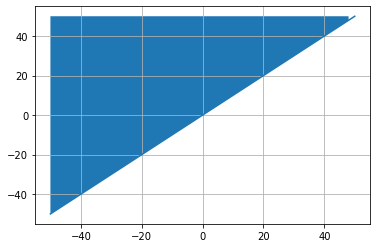


iii. What other prototypes will this network converge to, and what regions of the input space corresponds to each prototype (sket the regions).  Explain how you obtained your answer.
All prototypes above the line x=y because this is the decision matrix that would be generated by a weight = [[1, -1], [-1, 1]] and bias = [0, 0]


In [8]:
"""
Consider a Hopfield network, with the follwing weight and bias.

W = [[1, -1], [-1, 1]]  b = [0, 0].T

i.   The following input (initial condition) is applied to the network.  Find the network response (show the network output at each iteration until the network converges).
        p = [0.9, 1].T
ii.  Draw a sketch indicating what region of the input space will converge to the same final output that you found in part i. (In other words, for what other p vectors will
     the network converge to the same final output?) Explain how you obtained your answer.
iii. What other prototypes will this network converge to, and what regions of the input space corresponds to each prototype (sket the regions).  Explain how you obtained your answer.
"""

import numpy as np
import matplotlib.pyplot as plt

from HopfieldNetwork import HopfieldNetwork

if __name__ == "__main__":
    print("Consider a Hopfield network, with the follwing weight and bias.", "\n\tW = [[1, -1], [-1, 1]]  b = [0, 0].T")

    weights = np.array([[1, -1], [-1, 1]])
    bias = np.array([0, 0]).reshape((2, 1))

    test_input = np.array([0.9, 1]).reshape((2, 1))

    e3_3Network = HopfieldNetwork(weights= weights, bias = bias)
    e3_3Network.classify(a0 = test_input)

    print("\ni.   The following input (initial condition) is applied to the network.  Find the network response (show the network output at each iteration until the network converges).", "\n\tp = [0.9, 1].T")
    print("Listing activations")
    for index, activation in enumerate(e3_3Network.activations):
        print("\n", index, activation)


    print("\nii.  Draw a sketch indicating what region of the input space will converge to the same final output that you found in part i. (In other words, for what other p vectors will the network converge to the same final output?) Explain how you obtained your answer.")
    x = np.linspace(-50,50)
    y = x
    y_edge = np.linspace(50,50)
    plt.plot(x,y)
    plt.fill_between(x, y, y_edge, where = y_edge > y)
    plt.grid(True)
    plt.show()

    print("\niii. What other prototypes will this network converge to, and what regions of the input space corresponds to each prototype (sket the regions).  Explain how you obtained your answer.")
    print("All prototypes above the line x=y because this is the decision matrix that would be generated by a weight = [[1, -1], [-1, 1]] and bias = [0, 0]")

# E3.4

In [9]:

"""
Consider the following perceptron network.
W = [[1, 1], [-1, 1]]   b = [-2, 0].T   f = hardlims

i.   How many different classes can this network classify?
ii.  Draw a diagram illustrating the regions corresponding to each class.  Label each region with the corresponding network output.
iii. Calculate the network output for the following input.
        p = [1, -1].T
iv.  Plot the input from part iii. in your diagram from part ii, verify that it falls in the correctly labeled region.
"""

import numpy as np

from transfer_functions import hardlims
from Perceptron import Perceptron

if __name__ == "__main__":
    print("Consider the following perceptron network.",
          "\n\tW = [[1, 1], [-1, 1]]   b = [-2, 0].T   f = hardlims")
    
    weights = np.array([[1, 1], [-1, 1]])
    bias = np.array([-2, 0]).reshape((2, 1))

    e3_4_perceptron = Perceptron(W = weights, b = bias, transfer_function = hardlims)
    
    print("\ni.   How many different classes can this network classify?")
    print("4 networks since the possible outputs are [[-1, -1]], [[-1, 1]], [[1, -1]], [[1, 1]]")

    print("\nii.  Draw a diagram illustrating the regions corresponding to each class.  Label each region with the corresponding network output.")
    print("TODO!!!! I need to figure out how to determine these classification edges...")

    print("\niii. Calculate the network output for the following input.", "\n\tp = [1, -1].T")
    test_prototype = np.array([1, -1]).reshape((2, 1))
    print("Output:", e3_4_perceptron.classify(test_prototype))

    print("iv.  Plot the input from part iii. in your diagram from part ii, verify that it falls in the correctly labeled region.")
    print("TODO!!!! I need to figure out how to determine these classification edges...")


Consider the following perceptron network. 
	W = [[1, 1], [-1, 1]]   b = [-2, 0].T   f = hardlims

i.   How many different classes can this network classify?
4 networks since the possible outputs are [[-1, -1]], [[-1, 1]], [[1, -1]], [[1, 1]]

ii.  Draw a diagram illustrating the regions corresponding to each class.  Label each region with the corresponding network output.
TODO!!!! I need to figure out how to determine these classification edges...

iii. Calculate the network output for the following input. 
	p = [1, -1].T
Output: [[-1]
 [-1]]
iv.  Plot the input from part iii. in your diagram from part ii, verify that it falls in the correctly labeled region.
TODO!!!! I need to figure out how to determine these classification edges...


# E3.5

We want to design a perceptron network to output a 1 when either of these two vectors are input to the network: 
	[-1, 0].T       [1, 2].T 
and to output a -1 when either of the following vectors are input to the network: 
	[-1, 1].T       [0, 2].T

i.   Find and sketch a decision boundary for a network that will solve this problem


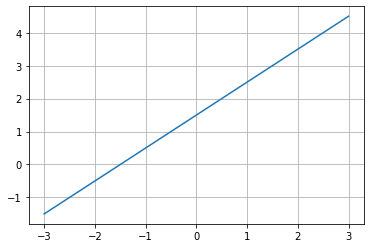


ii.  Find weights and biases that will produce the decision boundary you fond in part 1.  Show all work.
Weights:  [[ 1 -1]] bias 1.5 Weight and bias calculated by finding the orthogonal line to the decision boundary sketched above 
	Weight associated to slope, bias associated to y intercept in the equation y=mx+b

iii. Draw the network diagram using abreviated notation.
Passing on this since this is a programmatic implementation of these problems.  Also it seems rather trivial at this point.

iv.  For each of the four vectors given above, calculate the net input, n, and the network output, a, for the network you have designed. 
	Verify that your network sovles the problem.
		[-1, 0].T [[1]]
		[1, 2].T [[1]]
		[-1, 1].T [[-1]]
		[0, 2].T [[-1]]
v.   Are there other weights and biases that would solve the problem? If so, would you consider your weights best? Explain. 
As described in part ii.  This is the absolute best weight and bias as it was calculated from a median decision boundar

In [10]:

"""
We want to design a perceptron network to output a 1 when either of these two vectors are input to the network:
    [-1, 0].T       [1, 2].T
and to output a -1 when either of the following vectors are input to the network:
    [-1, 1].T       [0, 2].T

    i.   Find and sketch a decision boundary for a network that will solve this problem
    ii.  Find weights and biases that will produce the decision boundary you fond in part 1.  Show all work.
    iii. Draw the network diagram using abreviated notation.
    iv.  For each of the four vectors given above, calculate the net input, n, and the network output, a, for the network you have designed.
         Verify that your network sovles the problem.
    v.   Are there other weights and biases that would solve the problem? If so, would you consider your weights best? Explain. 
"""

import numpy as np
import matplotlib.pyplot as plt

from transfer_functions import hardlims, hardlim
from Perceptron import Perceptron


if __name__ == "__main__":
    print("We want to design a perceptron network to output a 1 when either of these two vectors are input to the network:",
          "\n\t[-1, 0].T       [1, 2].T",
          "\nand to output a -1 when either of the following vectors are input to the network:",
          "\n\t[-1, 1].T       [0, 2].T")

    print("\ni.   Find and sketch a decision boundary for a network that will solve this problem")
    x = np.linspace(-3,3, 100)
    y = x + 1.5

    plt.plot(x, y)
    plt.grid(True)
    plt.show()

    print("\nii.  Find weights and biases that will produce the decision boundary you fond in part 1.  Show all work.")
    W = np.array([1, -1]).reshape((1,2))
    b = 1.5
    print("Weights: ", W, "bias", b, "Weight and bias calculated by finding the orthogonal line to the decision boundary sketched above",
          "\n\tWeight associated to slope, bias associated to y intercept in the equation y=mx+b")

    e3_5_perceptron = Perceptron(W=W, b=b)

    o_1_1 = np.array([-1, 0]).reshape((2, 1))
    o_1_2 = np.array([1, 2]).reshape((2, 1))
    o_m1_1 = np.array([-1, 1]).reshape((2, 1))
    o_m1_2 = np.array([0, 2]).reshape((2, 1))

    print("\niii. Draw the network diagram using abreviated notation.")
    print("Passing on this since this is a programmatic implementation of these problems.  Also it seems rather trivial at this point.")

    print("\niv.  For each of the four vectors given above, calculate the net input, n, and the network output, a, for the network you have designed.",
          "\n\tVerify that your network sovles the problem.")
    print("\t\t[-1, 0].T", e3_5_perceptron.classify(o_1_1))
    print("\t\t[1, 2].T", e3_5_perceptron.classify(o_1_2))
    print("\t\t[-1, 1].T", e3_5_perceptron.classify(o_m1_1))
    print("\t\t[0, 2].T", e3_5_perceptron.classify(o_m1_2))

    print("v.   Are there other weights and biases that would solve the problem? If so, would you consider your weights best? Explain. ")
    print("As described in part ii.  This is the absolute best weight and bias as it was calculated from a median decision boundary equation.")


# E3.6

We have the following two prototype vectors: 
	p1 = [-1, 1].T    p2 = [1,1].T

i.    Find and sketch a decision boundary for a perceptron network that will recognize these two vectors.


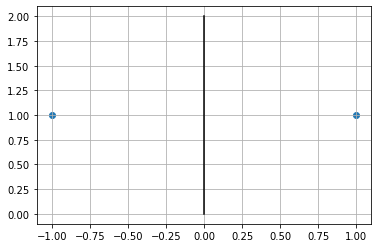


ii.   Find weights and bias that will produce the decision boundary you found in part i.
p1 [[-1]
 [ 1]] classification: [-1]
p2 [[1]
 [1]] classification: [1]

iv.   For the vector given below, calculate the net input, n, and the network output, a, for the network you have designed.  Does the network produce a good output? Explain. 
	p_test = [0.5, -0.5].T
p_test Classification =  [1]
This is a good classification because the test array lands on the right side of the purposed decision boundary and gets classified as such.

v.    Design a Hamming network to recognize the two vectors used in part i.
p1 [[-1]
 [ 1]] classification: [[1]
 [0]]
p2 [[1]
 [1]] classification: [[0]
 [1]]

vi.   Calculate the network output for the Hamming network for the input vector given in part iv.  Does the network produce a good output? Explain.
p_test Classification =  [[0]
 [1]]
This is a correct classification but only by chance as the Hamming Network is only designed to classify prototypes that cont

In [11]:

"""
We have the following two prototype vectors:
    p1 = [-1, 1].T    p2 = [1,1].T

i.    Find and sketch a decision boundary for a perceptron network that will recognize these two vectors.
ii.   Find weights and bias that will produce the decision boundary you found in part i.
iii.  Draw the network diagram using abreviated notation.
iv.   For the vector given below, calculate the net input, n, and the network output, a, for the network you have designed.  Does the network produce a good output? Explain.
      p_test = [0.5, -0.5].T
v.    Design a Hamming network to recognize the two vectors used in part i.
vi.   Calculate the network output for the Hamming network for the input vector given in part iv.  Does the network produce a good output? Explain.
vii.  Design a Hopfield network to recognize the two vectors used in part i.
viii. Calculate the network output for the Hopfield network for the input vector given in part iv.  Does the network produce a good output? Explain.
"""

import numpy as np
import matplotlib.pyplot as plt

from Perceptron import Perceptron
from HammingNetwork import HammingNetwork
from HopfieldNetwork import HopfieldNetwork

if __name__ == "__main__":
    print("We have the following two prototype vectors:",
          "\n\tp1 = [-1, 1].T    p2 = [1,1].T")
    p1 = np.array([-1, 1]).reshape((2, 1))
    p2 = np.array([1, 1]).reshape((2, 1))
    prototypes = np.array([p1.T[0], p2.T[0]])

    x = np.linspace(0, 0, 100)
    y = np.linspace(0, 2, 100)

    print("\ni.    Find and sketch a decision boundary for a perceptron network that will recognize these two vectors.")
    plt.scatter(prototypes[0], prototypes[1])
    plt.plot(x, y, color='black')
    plt.grid(True)
    plt.show()

    print("\nii.   Find weights and bias that will produce the decision boundary you found in part i.")
    Weights = np.array([1, 0])
    bias = 0

    e3_6_perceptron = Perceptron(W = Weights, b = bias)

    print("p1", p1, "classification:", e3_6_perceptron.classify(p1))
    print("p2", p2, "classification:", e3_6_perceptron.classify(p2))

    print("\niv.   For the vector given below, calculate the net input, n, and the network output, a, for the network you have designed.  Does the network produce a good output? Explain.",
          "\n\tp_test = [0.5, -0.5].T")

    p_test = np.array([0.5, -0.5]).reshape((2,1))
    print("p_test Classification = ", e3_6_perceptron.classify(p_test))
    print("This is a good classification because the test array lands on the right side of the purposed decision boundary and gets classified as such.")

    print("\nv.    Design a Hamming network to recognize the two vectors used in part i.")
    e3_6_hamming = HammingNetwork(prototypes=prototypes)
    print("p1", p1, "classification:", e3_6_hamming.classify(p1))
    print("p2", p2, "classification:", e3_6_hamming.classify(p2))

    print("\nvi.   Calculate the network output for the Hamming network for the input vector given in part iv.  Does the network produce a good output? Explain.")
    print("p_test Classification = ", e3_6_hamming.classify(p_test))
    print("This is a correct classification but only by chance as the Hamming Network is only designed to classify prototypes that contain two possible values only.")

    print("\nvii.  Design a Hopfield network to recognize the two vectors used in part i.")
    Weights = np.array([[1.2, 0], [0, 0.2]])
    bias = np.array([0, 0.9])

    e3_6_hopfield = HopfieldNetwork(weights=Weights, bias = bias)
    print("p1", p1, "classification:", e3_6_hopfield.classify(p1))
    print("p2", p2, "classification:", e3_6_hopfield.classify(p2))

    print("\nviii. Calculate the network output for the Hopfield network for the input vector given in part iv.  Does the network produce a good output? Explain.")
    print("p_test Classification = ", e3_6_hopfield.classify(p_test))
    print("Yes, this is the same classification outcome as expected and previously calculated from the other two networks.")
    

# E3.7

We want to design a Hamming network to recognize the following prototype vectors: 
	p1 = [1, 1].T p2 = [-1, -1].T p3 = [-1, 1].T
prototypes [[ 1  1]
 [-1 -1]
 [-1  1]]
p1 [[1]
 [1]] classification: [[1]
 [0]
 [0]]
p2 [[-1]
 [-1]] classification: [[0]
 [1]
 [0]]
p3 [[-1]
 [ 1]] classification: [[0]
 [0]
 [1]]

i.   Find the weight matrices and bias vectors for the Hamming network. 
	FeedForwardLayer Weights [[ 1  1]
 [-1 -1]
 [-1  1]] bias [[3]
 [3]
 [3]] 
	RecurrentLayer Weights [[ 1.   -0.49 -0.49]
 [-0.49  1.   -0.49]
 [-0.49 -0.49  1.  ]] bias There are no biases in the recurrrent layer.

iii. Apply the following input vector and calculate the total network response (iterating the second layer to convergence). Explain the meaning of the final network output. 
	p_test = [1, 0].T
	Classification: [[1]
 [0]
 [0]]

iv.  Sketch the decision boundaries for this network. Explain how you determined the boundaries.


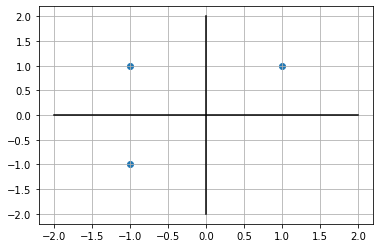

In [12]:

"""
We want to design a Hamming network to recognize the following prototype vectors:
    p1 = [1, 1].T   p2 = [-1, -1].T     p3 = [-1, 1].T

i.   Find the weight matrices and bias vectors for the Hamming network.
ii.  Draw the network diagram.
iii. Apply the following input vector and calculate the total network response
    (iterating the second layer to convergence). Explain the meaning of the final network output.
    p_test = [1, 0]
iv.  Sketch the decision boundaries for this network. Explain how you determined the boundaries.
"""

import numpy as np
import matplotlib.pyplot as plt
from HammingNetwork import HammingNetwork

if __name__ == "__main__":
    print("We want to design a Hamming network to recognize the following prototype vectors:",
          "\n\tp1 = [1, 1].T", "p2 = [-1, -1].T", "p3 = [-1, 1].T")
    p1 = np.array([1, 1]).reshape((2, 1))
    p2 = np.array([-1,-1]).reshape((2, 1))
    p3 = np.array([-1, 1]).reshape((2, 1))

    prototypes = np.array([p1.T, p2.T, p3.T]).reshape((3, 2))
    print("prototypes", prototypes)

    e3_7_hamming = HammingNetwork(prototypes=prototypes)

    print("p1", p1, "classification:", e3_7_hamming.classify(p1))
    print("p2", p2, "classification:", e3_7_hamming.classify(p2))
    print("p3", p3, "classification:", e3_7_hamming.classify(p3))

    print("\ni.   Find the weight matrices and bias vectors for the Hamming network.",
          "\n\tFeedForwardLayer", "Weights", e3_7_hamming.feedForwardLayer.Weights, "bias", e3_7_hamming.feedForwardLayer.bias,
          "\n\tRecurrentLayer", "Weights", e3_7_hamming.recurrentLayer.Weights, "bias", "There are no biases in the recurrrent layer.")

    print("\niii. Apply the following input vector and calculate the total network response (iterating the second layer to convergence). Explain the meaning of the final network output.",
          "\n\tp_test = [1, 0].T")
    p_test = np.array([1, 0]).reshape((2, 1))
    print("\tClassification:", e3_7_hamming.classify(p_test))

    print("\niv.  Sketch the decision boundaries for this network. Explain how you determined the boundaries.")
    x = np.linspace(-2, 2, 100)
    y = np.linspace(0, 0, 100)

    x2 = np.linspace(0, 0, 100)
    y2 = np.linspace(-2, 2, 100)

    plt.scatter(prototypes[:, 0], prototypes[:, 1])
    plt.plot(x, y, color='black')
    plt.plot(x2, y2, color='black')
    plt.grid(True)
    plt.show()
    